# Apply PCM to argo reference data base

First try

In [1]:
import xarray as xr
import numpy as np
import numpy.ma as ma
import pandas as pd

import pyxpcm
from pyxpcm.models import pcm

import Plotter
from Plotter import Plotter

from BIC_calculation import *

from classif_functions import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
np.set_printoptions(threshold=sys.maxsize)

### __User inputs__

Reference data selection

In [2]:
# geographical extent
#geo_extent = [-9, 31, -40, -26] # [min lon, max lon, min lat, max lat]
geo_extent = [-13, 85, -66, -42] #southern ocean
#geo_extent = [-70, -40, 32, 50] #north atlantic
# depth for interpolation
max_depth = 1000
# chose season ('DJF', 'MAM', 'JJA', 'SON' or 'all')
season = ['all']

Float you want to correct

In [3]:
# southern ocean
float_mat_path = '/home1/homedir5/perso/agarciaj/EARISE/DMQC-PCM/OWC-pcm/matlabow/data/float_source/test2/3901928.mat'
float_WMO = 3901928
# north atlantic 
#float_mat_path = '/home1/homedir5/perso/agarciaj/EARISE/DMQC-PCM/OWC-pcm/matlabow/data/float_source/test1/4900136.mat'
#float_WMO = 4900136

Model parameters

In [4]:
K=4 # number of classes

## 1. Load argo reference database

__Load argo reference database__

In [5]:
ds = get_refdata(geo_extent=geo_extent, 
                 WMOboxes_latlon='WMO_boxes_latlon.txt', 
                 wmo_boxes='wmo_boxes_argo.mat', 
                 ref_path = '/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology/',
                 season = season)

/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3400.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3500.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3600.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3401.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3501.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3601.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3402.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3502.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3602.mat
/home1/homedir5/perso/agarciaj/EARISE/OW/matlabow/data/climatology//argo_profiles/argo_3403.mat
/home1/homedir5/perso/agarciaj/EARISE/OW

In [6]:
print(ds)

<xarray.Dataset>
Dimensions:     (n_pres: 1024, n_profiles: 25008)
Coordinates:
    long        (n_profiles) float64 9.447 9.116 8.509 ... 350.1 350.3 350.1
    lat         (n_profiles) float64 -48.88 -43.54 -43.28 ... -64.41 -64.23
    dates       (n_profiles) datetime64[ns] 2006-02-16T13:19:44 ... 2006-01-0...
  * n_profiles  (n_profiles) int64 0 1 2 3 4 5 ... 25003 25004 25005 25006 25007
  * n_pres      (n_pres) int64 0 1 2 3 4 5 6 ... 1018 1019 1020 1021 1022 1023
Data variables:
    pres        (n_pres, n_profiles) float64 5.0 5.0 5.0 5.0 ... nan nan nan nan
    temp        (n_pres, n_profiles) float64 4.929 10.74 10.83 ... nan nan nan
    sal         (n_pres, n_profiles) float64 33.73 34.4 34.39 ... nan nan nan
    source      (n_profiles) object '1900577_007.BRECKOWENS' ... '7900072_033...
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...
    __version__:  1.0
    __globals__:  1.0


In [ ]:
#ds = ds.set_index(n_profiles = ['lat', 'long'])
#print(ds)

In [ ]:
ds['n_profiles'].values

In [ ]:
ds_coords = ds[['long', 'lat']]
ds_coords['long'].values= np.mod((ds_coords['long'].values+180),360)-180
print(ds_coords)
#ds_lons = np.mod((ds['long']+180),360)-180
#ds_lats =  np.mod((ds['lat']+180),360)-180

## 2. Create training dataset

Use a regular sampling

In [7]:
corr_dist = 100 # in km
ds_t = get_regulargrid_dataset(ds, corr_dist, grid_extent=geo_extent, gridplot=False)

[-44.89]
[77.216]
[-13, 85, -66, -42]
29
80
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[   19    33   131   132   161   170   182   197   202   246   259   262
   309   320   374   411   422   426   438   456   558   657   794   813
   842   893   902   909   945   989   995  1002  1022  1023  1067  1071
  1105  1176  1189  1191  1210  1230  1238  1242  1265  1288  1289  1296
  1307  1318  1327  1332  1411  1446  1499  1513  1527  1550  1558  1568
  1574  1575  1580  1628  1673  1729  1749  1755  1766  1773  1840  1869
  1877  1896  1899  1911  1921  1930  1972  1988  1992  2001  2045  2059
  2094  2095  2096  2100  2143  2168  2177  2181  2195  2204  2220  2221
  2224  2227  2230  2231  2239  2246  2247  2257  2270  2283  2286  2292
  2297  2309  2323  2336  2346  2348  2356  2365  2394  2410  2432  2451
  2455  2500  2523  2536  2572  2577  2585  2589  2597  2598  2600  2615
  2623  2625  2628  2642  2660  2672  2684  2685  2687  2688  2697  2711
  2

In [8]:
print(ds_t)

<xarray.Dataset>
Dimensions:     (n_pres: 1024, n_profiles: 1466)
Coordinates:
    long        (n_profiles) float64 8.154 5.468 9.557 ... -6.516 -6.924 -7.992
    lat         (n_profiles) float64 -42.2 -49.4 -42.01 ... -64.79 -64.73 -64.75
    dates       (n_profiles) datetime64[ns] 2009-01-31T13:17:17 ... 2006-01-2...
  * n_profiles  (n_profiles) int64 19 33 131 132 161 ... 24986 24992 24994 24996
  * n_pres      (n_pres) int64 0 1 2 3 4 5 6 ... 1018 1019 1020 1021 1022 1023
Data variables:
    pres        (n_pres, n_profiles) float64 5.0 5.5 5.5 5.5 ... nan nan nan nan
    temp        (n_pres, n_profiles) float64 11.3 4.568 12.82 ... nan nan nan
    sal         (n_pres, n_profiles) float64 34.47 33.81 34.38 ... nan nan nan
    source      (n_profiles) object '1900785_042.BRECKOWENS' ... '7900071_035...
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...
    __version__:  1.0
    __globals__:  1.0


plot dataset

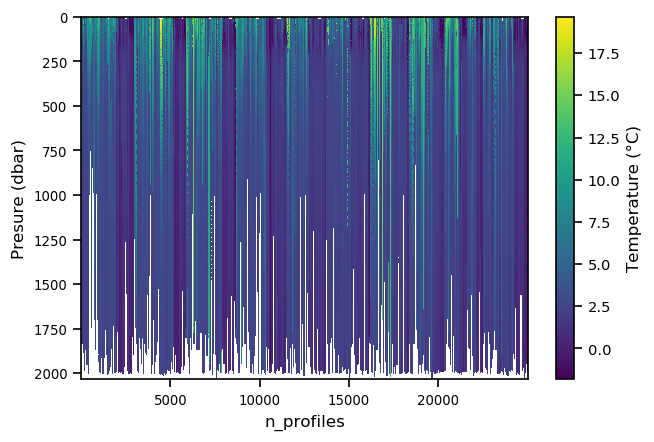

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=120, facecolor='w', edgecolor='k')
sc = ax.pcolor(np.tile(ds_t['n_profiles'], (len(ds_t['n_pres']),1)), ds_t['pres'], ds_t['temp'], cmap='viridis')
ax.invert_yaxis()
cbar = plt.colorbar(sc)
cbar.set_label('Temperature (°C)', fontsize=10)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.set_ylabel('Presure (dbar)', fontsize=10);
ax.set_xlabel('n_profiles', fontsize=10);

__Interpolate to standard levels__

In [10]:
std_lev = np.arange(0,max_depth)
ds_t = interpolate_standard_levels(ds_t, std_lev)

/home1/homedir5/perso/agarciaj/EARISE/DMQC-PCM/PCM-design/classif_functions.py:114: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  kwargs = dict(


In [11]:
# some format
#pres should be negative for the PCM
ds_t['PRES_INTERPOLATED'] = -np.abs(ds_t['PRES_INTERPOLATED'].values)
#axis attributtes for plotter class
ds_t.PRES_INTERPOLATED.attrs['axis'] = 'Z'
ds_t.lat.attrs['axis'] = 'Y'
ds_t.long.attrs['axis'] = 'X'
ds_t.dates.attrs['axis'] = 'T'

In [12]:
print(ds_t)

<xarray.Dataset>
Dimensions:            (n_profiles: 1408, PRES_INTERPOLATED: 1000)
Coordinates:
    long               (n_profiles) float64 8.154 5.468 9.557 ... -6.924 -7.992
    lat                (n_profiles) float64 -42.2 -49.4 -42.01 ... -64.73 -64.75
    dates              (n_profiles) datetime64[ns] 2009-01-31T13:17:17 ... 20...
  * n_profiles         (n_profiles) int64 19 33 131 132 ... 24992 24994 24996
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 -1 -2 -3 ... -997 -998 -999
Data variables:
    pres               (n_profiles, PRES_INTERPOLATED) float64 5.0 5.0 ... 999.0
    sal                (n_profiles, PRES_INTERPOLATED) float64 34.47 ... 34.68
    source             (n_profiles) object '1900785_042.BRECKOWENS' ... '7900...
    temp               (n_profiles, PRES_INTERPOLATED) float64 11.3 ... 0.2741
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...
    __version__:  1.0
    __globals__:  1.0


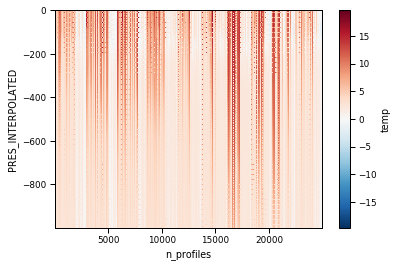

In [13]:
ds_t['temp'].plot(x='n_profiles');

Spatial distribution of training dataset

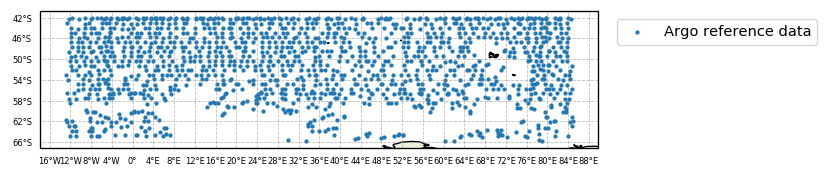

In [15]:
proj=ccrs.PlateCarree()
subplot_kw = {'projection': proj}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(
            6, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

p1 = ax.scatter(ds_t['long'], ds_t['lat'], s=3, transform=proj, label='Argo reference data')

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax.add_feature(land_feature, edgecolor='black')

defaults = {'linewidth': .5, 'color': 'gray', 'alpha': 0.5, 'linestyle': '--'}
gl = ax.gridlines(crs=ax.projection,draw_labels=True, **defaults)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 4))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90+1, 4))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'fontsize': 5}
gl.ylabel_style = {'fontsize': 5}
gl.xlabels_top = False
gl.ylabels_right = False

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## 3. Create prediction dataset

Add float data to initial dataset

In [16]:
ds_p = add_floatdata(float_WMO, float_mat_path, ds)

In [17]:
print(ds_p)

<xarray.Dataset>
Dimensions:     (n_pres: 1024, n_profiles: 25172)
Coordinates:
    long        (n_profiles) float64 9.447 9.116 8.509 ... 69.79 71.76 72.34
    lat         (n_profiles) float64 -48.88 -43.54 -43.28 ... -46.2 -45.57
    dates       (n_profiles) datetime64[ns] 2006-02-16T13:19:44 ... 2021-01-01
  * n_profiles  (n_profiles) int64 0 1 2 3 4 5 ... 25167 25168 25169 25170 25171
  * n_pres      (n_pres) int64 0 1 2 3 4 5 6 ... 1018 1019 1020 1021 1022 1023
Data variables:
    pres        (n_pres, n_profiles) float64 5.0 5.0 5.0 5.0 ... nan nan nan nan
    temp        (n_pres, n_profiles) float64 4.929 10.74 10.83 ... nan nan nan
    sal         (n_pres, n_profiles) float64 33.73 34.4 34.39 ... nan nan nan
    source      (n_profiles) object '1900577_007.BRECKOWENS' ... 'selected_fl...
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...
    __version__:  1.0
    __globals__:  1.0


plot dataset

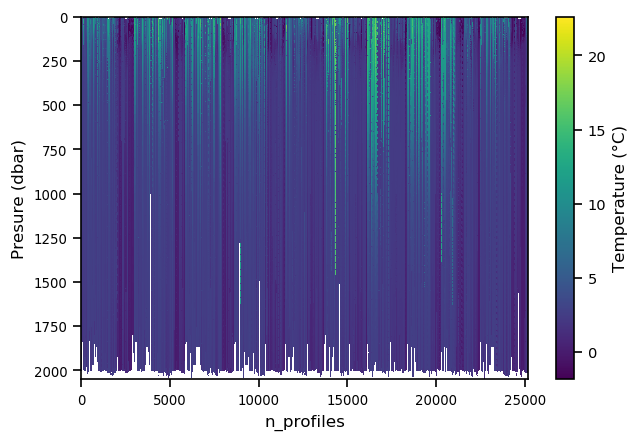

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), dpi=120, facecolor='w', edgecolor='k')
sc = ax.pcolor(np.tile(ds_p['n_profiles'], (len(ds_p['n_pres']),1)), ds_p['pres'], ds_p['temp'], cmap='viridis')
ax.invert_yaxis()
cbar = plt.colorbar(sc)
cbar.set_label('Temperature (°C)', fontsize=10)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.set_ylabel('Presure (dbar)', fontsize=10);
ax.set_xlabel('n_profiles', fontsize=10);

__Interpolate to standard levels__

In [19]:
std_lev = np.arange(0,max_depth)
ds_p = interpolate_standard_levels(ds_p, std_lev)

/home1/homedir5/perso/agarciaj/EARISE/DMQC-PCM/PCM-design/classif_functions.py:114: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  kwargs = dict(


In [20]:
# some format
#pres should be negative for the PCM
ds_p['PRES_INTERPOLATED'] = -np.abs(ds_p['PRES_INTERPOLATED'].values)
#axis attributtes for plotter class
ds_p.PRES_INTERPOLATED.attrs['axis'] = 'Z'
ds_p.lat.attrs['axis'] = 'Y'
ds_p.long.attrs['axis'] = 'X'
ds_p.dates.attrs['axis'] = 'T'

In [21]:
print(ds_p)

<xarray.Dataset>
Dimensions:            (n_profiles: 23992, PRES_INTERPOLATED: 1000)
Coordinates:
    long               (n_profiles) float64 9.447 9.116 8.509 ... 71.76 72.34
    lat                (n_profiles) float64 -48.88 -43.54 ... -46.2 -45.57
    dates              (n_profiles) datetime64[ns] 2006-02-16T13:19:44 ... 20...
  * n_profiles         (n_profiles) int64 0 1 2 3 4 ... 25168 25169 25170 25171
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 -1 -2 -3 ... -997 -998 -999
Data variables:
    pres               (n_profiles, PRES_INTERPOLATED) float64 5.0 5.0 ... 999.0
    sal                (n_profiles, PRES_INTERPOLATED) float64 33.73 ... 34.72
    source             (n_profiles) object '1900577_007.BRECKOWENS' ... 'sele...
    temp               (n_profiles, PRES_INTERPOLATED) float64 4.929 ... 2.464
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...
    __version__:  1.0
    __globals__:  1.0


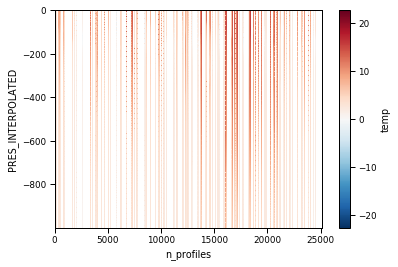

In [22]:
ds_p['temp'].plot(x='n_profiles');

__Plot float trajectory and ref profiles__

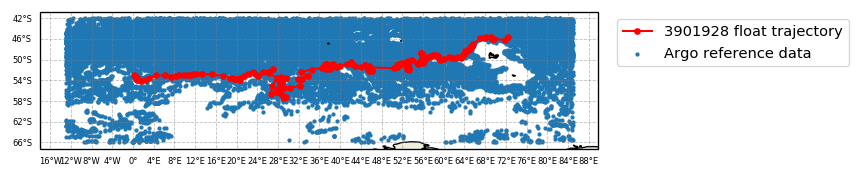

In [23]:
selected_float_index = [i for i, isource in enumerate(ds_p['source'].values) if isource == 'selected_float']

proj=ccrs.PlateCarree()
subplot_kw = {'projection': proj}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(
            6, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

p1 = ax.scatter(ds_p['long'], ds_p['lat'], s=3, transform=proj, label='Argo reference data')
p2 = ax.plot(ds_p['long'].isel(n_profiles = selected_float_index), ds_p['lat'].isel(n_profiles = selected_float_index), 
                 'ro-', transform=proj, markersize = 3, label = str(float_WMO) + ' float trajectory')

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax.add_feature(land_feature, edgecolor='black')

defaults = {'linewidth': .5, 'color': 'gray', 'alpha': 0.5, 'linestyle': '--'}
gl = ax.gridlines(crs=ax.projection,draw_labels=True, **defaults)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 4))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90+1, 4))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'fontsize': 5}
gl.ylabel_style = {'fontsize': 5}
gl.xlabels_top = False
gl.ylabels_right = False

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

## 2. Apply PCM

Create model

In [24]:
z_dim = 'PRES_INTERPOLATED'
var_name_mdl = ['temp', 'sal']

# pcm feature
z = ds_t[z_dim]
pcm_features = {var_name_mdl[0]: z, var_name_mdl[1]: z}

m = pcm(K=K, features=pcm_features)
m

<pcm 'gmm' (K: 4, F: 2)>
Number of class: 4
Number of feature: 2
Feature names: odict_keys(['temp', 'sal'])
Fitted: False
Feature: 'temp'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'sal'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

Fit model

In [25]:
var_name_ds = ['temp', 'sal']
# Variable to be fitted {variable name in model: variable name in dataset}
features_in_ds = {var_name_mdl[0] : var_name_ds[0], var_name_mdl[1] : var_name_ds[1]}

m.fit(ds_t, features=features_in_ds, dim=z_dim)
m

<pcm 'gmm' (K: 4, F: 2)>
Number of class: 4
Number of feature: 2
Feature names: odict_keys(['temp', 'sal'])
Fitted: True
Feature: 'temp'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'sal'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 41.068898

Predict labels

In [26]:
m.predict(ds_p, features=features_in_ds, inplace = True)
print(ds_p)

<xarray.Dataset>
Dimensions:            (n_profiles: 23992, PRES_INTERPOLATED: 1000)
Coordinates:
    long               (n_profiles) float64 9.447 9.116 8.509 ... 71.76 72.34
    lat                (n_profiles) float64 -48.88 -43.54 ... -46.2 -45.57
    dates              (n_profiles) datetime64[ns] 2006-02-16T13:19:44 ... 20...
  * n_profiles         (n_profiles) int64 0 1 2 3 4 ... 25168 25169 25170 25171
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 -1 -2 -3 ... -997 -998 -999
Data variables:
    pres               (n_profiles, PRES_INTERPOLATED) float64 5.0 5.0 ... 999.0
    sal                (n_profiles, PRES_INTERPOLATED) float64 33.73 ... 34.72
    source             (n_profiles) object '1900577_007.BRECKOWENS' ... 'sele...
    temp               (n_profiles, PRES_INTERPOLATED) float64 4.929 ... 2.464
    PCM_LABELS         (n_profiles) int64 0 3 3 3 3 3 3 3 3 ... 0 3 0 3 0 3 0 3
Attributes:
    __header__:   b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue S...


In [27]:
ds_p = order_class_names(ds_p, K=K)

In [28]:
m.predict_proba(ds_p, features=features_in_ds, dim=z_dim, inplace=True);

In [30]:
ds_p = ds_p.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=var_name_ds[0], outname=var_name_ds[0] + '_Q', keep_attrs=True, inplace=True)
ds_p = ds_p.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=var_name_ds[1], outname=var_name_ds[1] + '_Q', keep_attrs=True, inplace=True)

In [31]:
print(ds_p)

<xarray.Dataset>
Dimensions:            (pcm_class: 4, n_profiles: 23992, PRES_INTERPOLATED: 1000, quantile: 3)
Coordinates:
  * pcm_class          (pcm_class) int64 0 1 2 3
    long               (n_profiles) float64 9.447 9.116 8.509 ... 71.76 72.34
    lat                (n_profiles) float64 -48.88 -43.54 ... -46.2 -45.57
    dates              (n_profiles) datetime64[ns] 2006-02-16T13:19:44 ... 20...
  * n_profiles         (n_profiles) int64 0 1 2 3 4 ... 25168 25169 25170 25171
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 -1 -2 -3 ... -997 -998 -999
  * quantile           (quantile) float64 0.05 0.5 0.95
Data variables:
    pres               (n_profiles, PRES_INTERPOLATED) float64 5.0 5.0 ... 999.0
    sal                (n_profiles, PRES_INTERPOLATED) float64 33.73 ... 34.72
    source             (n_profiles) object '1900577_007.BRECKOWENS' ... 'sele...
    temp               (n_profiles, PRES_INTERPOLATED) float64 4.929 ... 2.464
    PCM_LABELS         (n_profiles) float

## 3. BIC plot

User input

In [33]:
corr_dist = 50 # correlation distance in km
time_steps = ['2018-01','2018-07']  # time steps to be used into account
Nrun = 10 # number of runs for each k
NK = 20 # max number of classes to explore

BIC calculation __(not std for the moment)__

In [34]:
BIC = []

#select_prof = np.arange(0,len(ds_p.n_profiles.values),8)
#ds_run = ds_p.isel(n_profiles = select_prof)
ds_run = ds_t
    
for i in range(1,NK):
    print(i)
    model = pcm(K=i, features=pcm_features)
    model.fit_predict(ds_run, features=features_in_ds, dim=z_dim)
    BIC.append(model.bic(ds_run, features=features_in_ds, dim=z_dim))
    
#BIC

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


BIC plot

BIC min: 5


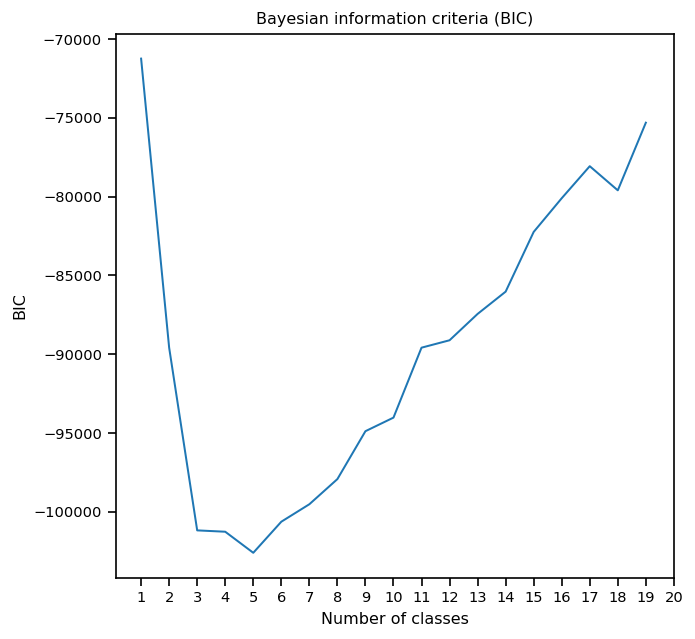

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(
            6, 6), dpi=120, facecolor='w', edgecolor='k')

ax.plot(np.arange(1,NK), BIC)
plt.ylabel('BIC')
plt.xlabel('Number of classes')
plt.xticks(np.arange(NK) + 1)
plt.title('Bayesian information criteria (BIC)')

print('BIC min: ' + str(np.argmin(BIC) + 1))

## 4. Plots

In [36]:
P = Plotter(ds_p, m, coords_dict= {'latitude': 'lat', 'longitude': 'long', 'time': 'dates'})
P.data_type = 'profiles'

vertical structure

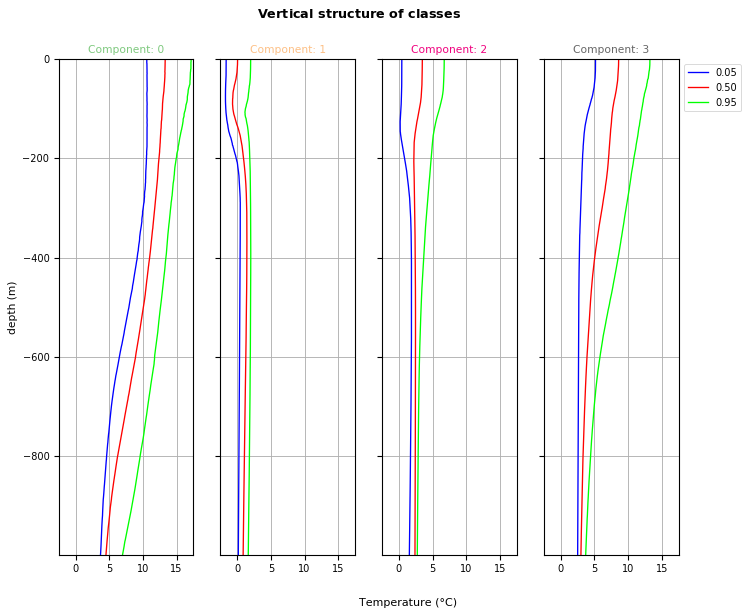

In [37]:
P.vertical_structure(q_variable = var_name_ds[0] + '_Q', sharey=True, xlabel='Temperature (°C)', xlim=[-2.5,17.5])

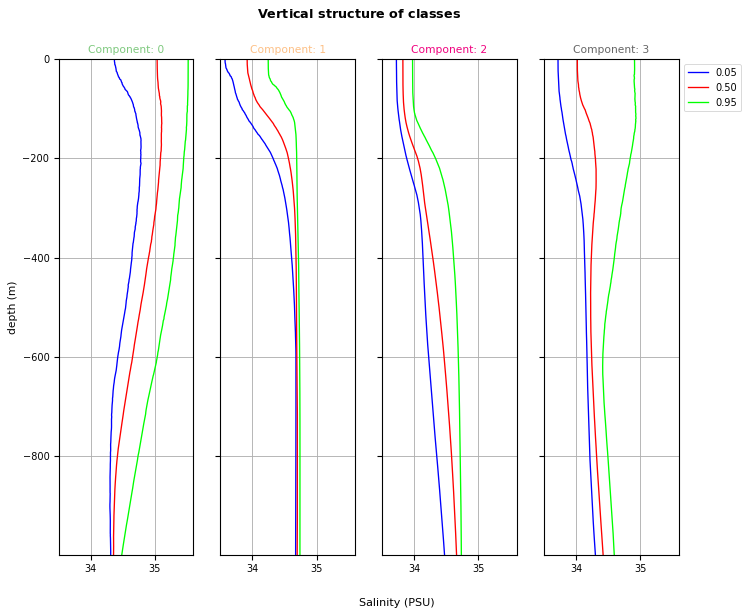

In [38]:
P.vertical_structure(q_variable = var_name_ds[1] + '_Q', sharey=True, xlabel='Salinity (PSU)', xlim=[33.5,35.6])

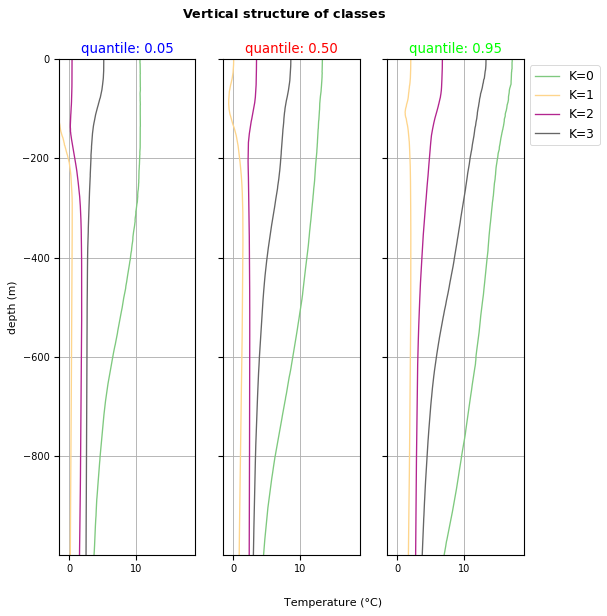

In [39]:
P.vertical_structure_comp(q_variable = var_name_ds[0] + '_Q', plot_q= 'all', xlabel='Temperature (°C)')

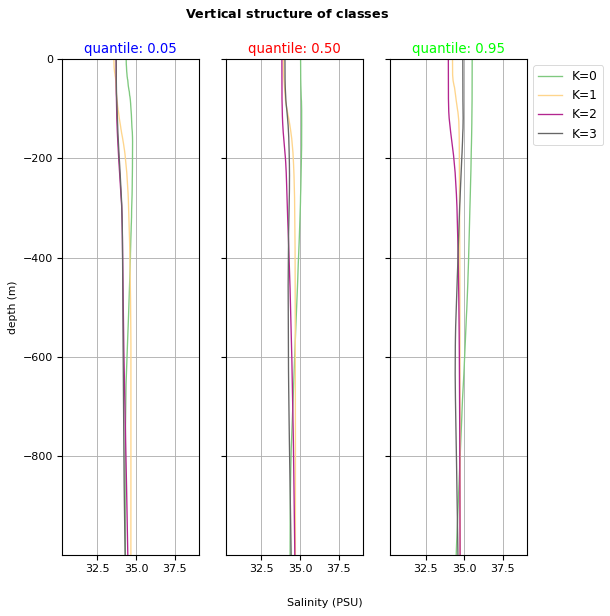

In [40]:
P.vertical_structure_comp(q_variable = var_name_ds[1] + '_Q', plot_q= 'all', xlabel='Salinity (PSU)')

spatial distribution

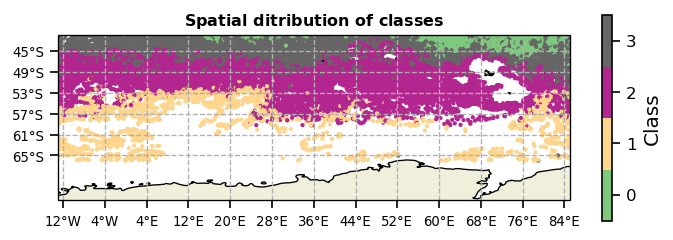

In [41]:
P.spatial_distribution(lonlat_grid =[8,4])

Classes pie chart

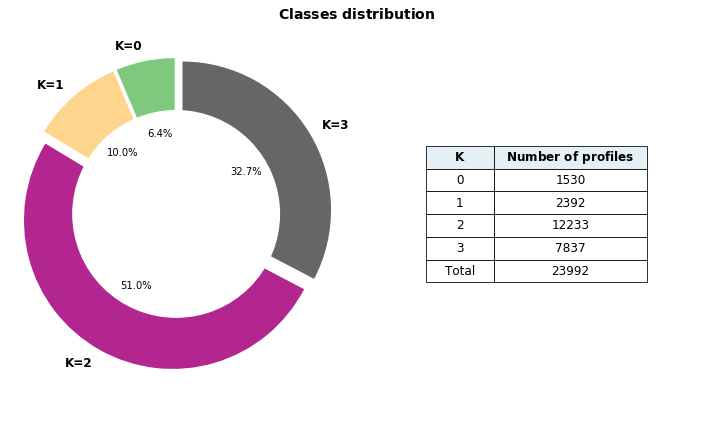

In [42]:
P.pie_classes()

Temporal representation

Bar plot by month

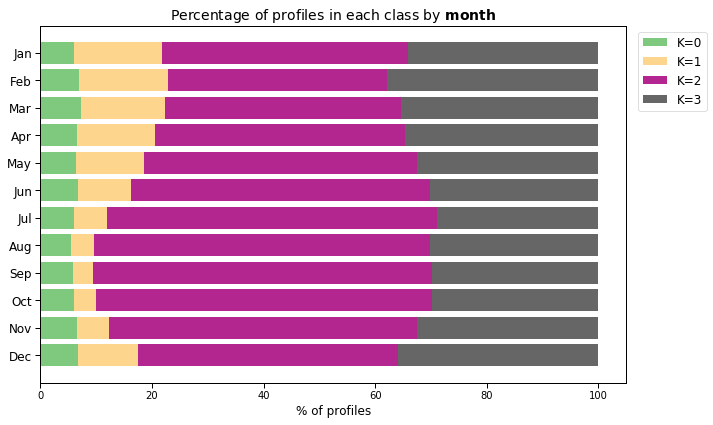

In [43]:
P.temporal_distribution(time_bins = 'month')

Bar plot by season

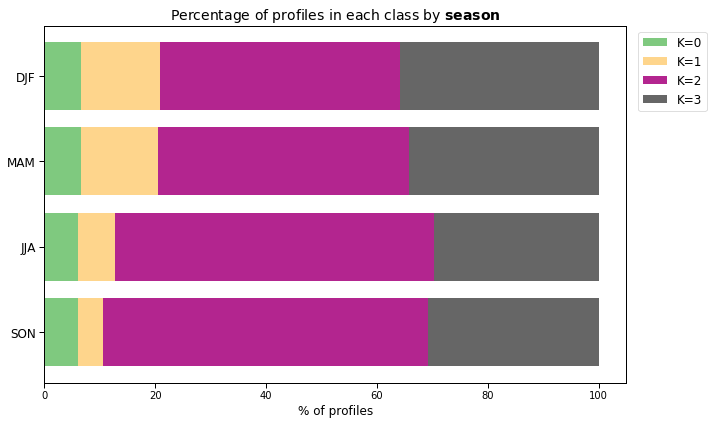

In [44]:
P.temporal_distribution(time_bins = 'season')

## 4. Output

Create a .txt file with classes

In [ ]:
#create array with source, lat, long and PCM_labels
# change long values to 0-360 as used in OW
#long_360 = np.mod(ds_out['long'].values, 360)
matrix_txt = np.stack((ds_out['source'].values, ds_out['lat'].values, ds_out['long'].values, ds_out['PCM_LABELS'].values), axis=1)
header = 'source lat long PCM_LABELS'

f= open("output_files/PCM_classes_3901928_argo_k4.txt","w+")
np.savetxt(f, matrix_txt, fmt=['%s', '%.3f', '%.3f', '%i'], header=header)
f.close() 

## 5. Plot with AVISO

Load AVISO data

In [ ]:
path_aviso = '/home1/homedir5/perso/agarciaj/EARISE/data/AVISO_gulfstream_2004.nc'
ds_aviso = xr.open_dataset(path_aviso)
ds_aviso

In [ ]:
ds_aviso['longitude'] = np.mod((ds_aviso.longitude.values+180),360)-180
ds_aviso

In [ ]:
time_step = '2004-09-03'

scatter plot using class

In [ ]:
selected_float_index = [i for i, isource in enumerate(ds_out['source'].values) if isource == 'selected_float']

proj=ccrs.PlateCarree()
subplot_kw = {'projection': proj}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(
            6, 6), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

sc = ax.pcolormesh(ds_aviso['longitude'], ds_aviso['latitude'], ds_aviso['adt'].sel(time = time_step), cmap='bwr', transform=proj)
p1 = ax.scatter(ds_out['long'].isel(n_profiles = selected_float_index), ds_out['lat'].isel(n_profiles = selected_float_index), 
                 s=8, c=ds_out['PCM_LABELS'].isel(n_profiles = selected_float_index), transform=proj, cmap='Accent')
#p2 = ax.scatter(ds_out['long'], ds_out['lat'], s=3, transform=proj, label='Argo reference data')
#p3 = ax.plot(ds_out['long'].isel(n_profiles = selected_float_index), ds_out['lat'].isel(n_profiles = selected_float_index), 
#                 'ro-', transform=proj, markersize = 3, label = str(float_WMO) + ' float trajectory')

land_feature = cfeature.NaturalEarthFeature(
            category='physical', name='land', scale='50m', facecolor=[0.9375, 0.9375, 0.859375])
ax.add_feature(land_feature, edgecolor='black')

defaults = {'linewidth': .5, 'color': 'gray', 'alpha': 0.5, 'linestyle': '--'}
gl = ax.gridlines(crs=ax.projection,draw_labels=True, **defaults)
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180+1, 4))
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90+1, 4))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'fontsize': 5}
gl.ylabel_style = {'fontsize': 5}
gl.xlabels_top = False
gl.ylabels_right = False

#plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
ax.set_xlim([-64,-48])
legend1 = ax.legend(*p1.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)